## Importing Libraries

In [1]:
import os
import shutil
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

## General plots

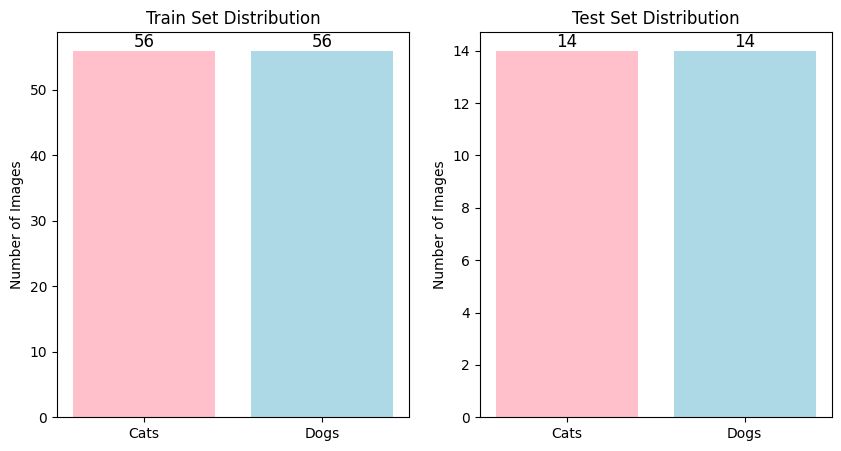

✅ Test set is balanced.


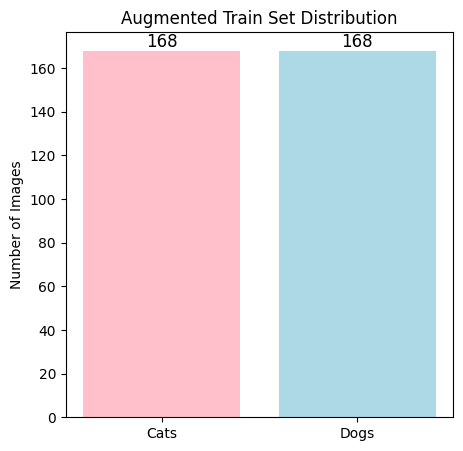

✅ Augmented dataset found and compared.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
train_labels = np.load("train_dataset/train_labels.npy")
test_labels = np.load("test_dataset/test_labels.npy")

# Count images in each category (0 = Cats, 1 = Dogs)
train_cat_count = np.sum(train_labels == 0)
train_dog_count = np.sum(train_labels == 1)
test_cat_count = np.sum(test_labels == 0)
test_dog_count = np.sum(test_labels == 1)

# Bar graph for train and test set distribution
categories = ["Cats", "Dogs"]
train_counts = [train_cat_count, train_dog_count]
test_counts = [test_cat_count, test_dog_count]

plt.figure(figsize=(10, 5))

# Train set bar graph
plt.subplot(1, 2, 1)
bars = plt.bar(categories, train_counts, color=['pink', 'lightblue'])
plt.title("Train Set Distribution")
plt.ylabel("Number of Images")

# Add exact values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=12)

# Test set bar graph
plt.subplot(1, 2, 2)
bars = plt.bar(categories, test_counts, color=['pink', 'lightblue'])
plt.title("Test Set Distribution")
plt.ylabel("Number of Images")

# Add exact values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=12)

plt.show()

# Check test set balance
if abs(test_cat_count - test_dog_count) <= 5:  # Allow small variation
    print(" Test set is balanced.")
else:
    print("⚠️ Test set may not be balanced!")

# If augmented dataset exists, compare with non-augmented
try:
    aug_train_labels = np.load("augmented_train/train_labels.npy")
    aug_cat_count = np.sum(aug_train_labels == 0)
    aug_dog_count = np.sum(aug_train_labels == 1)

    plt.figure(figsize=(5, 5))
    bars = plt.bar(categories, [aug_cat_count, aug_dog_count], color=['pink', 'lightblue'])
    plt.title("Augmented Train Set Distribution")
    plt.ylabel("Number of Images")

    # Add exact values on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                 str(bar.get_height()), ha='center', va='bottom', fontsize=12)

    plt.show()

    print(" Augmented dataset found and compared.")
except FileNotFoundError:
    print("❌ No augmented dataset found.")

In [38]:
#originally 80-20 
56/(56+14)
#then split changed due to augmentation 
168/(168+14)
#approx 90-10

0.9230769230769231

Note: The augmented train set can be divided into two parts => 112 + 224

- Here, 112 original train images are present as it is.
- Addtionally, we have 224 augmented images (each original augmented twice), based on some function. 
- there are three random transformations performed on each of the image that is augmented. 
- Note: finally we have resized each of them to 224x224x3 so as to ensure same input sizes. 
- Finally we randomly shuffle our train set.  

## Test images

In [20]:
test_images = np.load("test_dataset/test_images.npy")
test_labels = np.load("test_dataset/test_labels.npy")

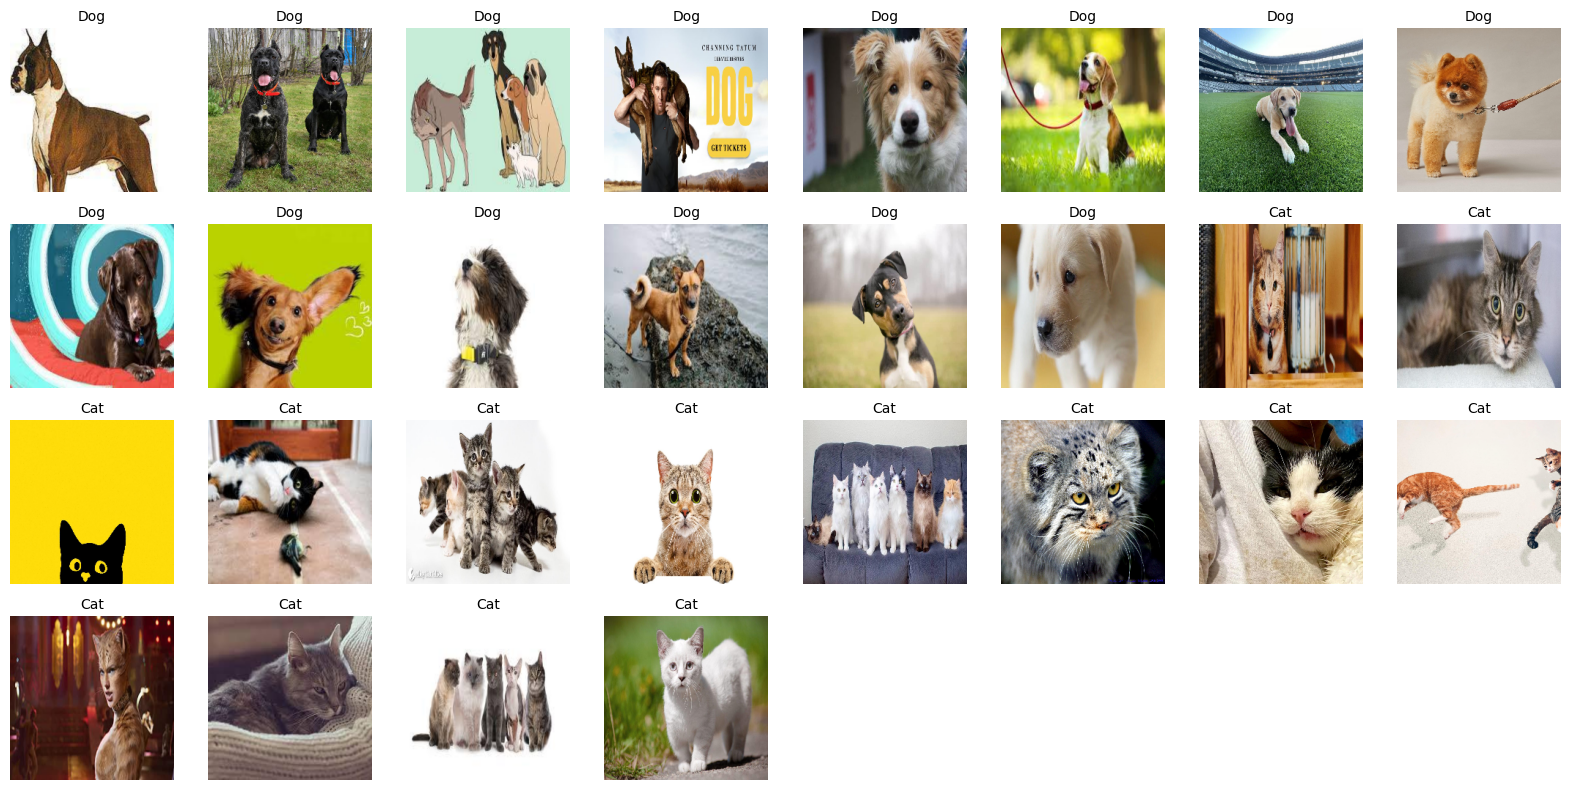

In [21]:
#  Define category names
categories = ["Cat", "Dog"]

# Determine grid size (rows, cols)
num_images = len(test_images)
cols = 8  # Number of columns per row
rows = (num_images // cols) + (num_images % cols > 0)  # Compute required rows

plt.figure(figsize=(cols * 2, rows * 2))  # Adjust figure size

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_images[i])  # Display image
    plt.axis("off")  # Hide axis
    plt.title(categories[test_labels[i]], fontsize=10)  # Add label title

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Train before augmentation

In [22]:
train_images = np.load("train_dataset/train_images.npy")
train_labels = np.load("train_dataset/train_labels.npy")  # Assuming this contains labels

train_images.shape, train_labels.shape

((112, 224, 224, 3), (112,))

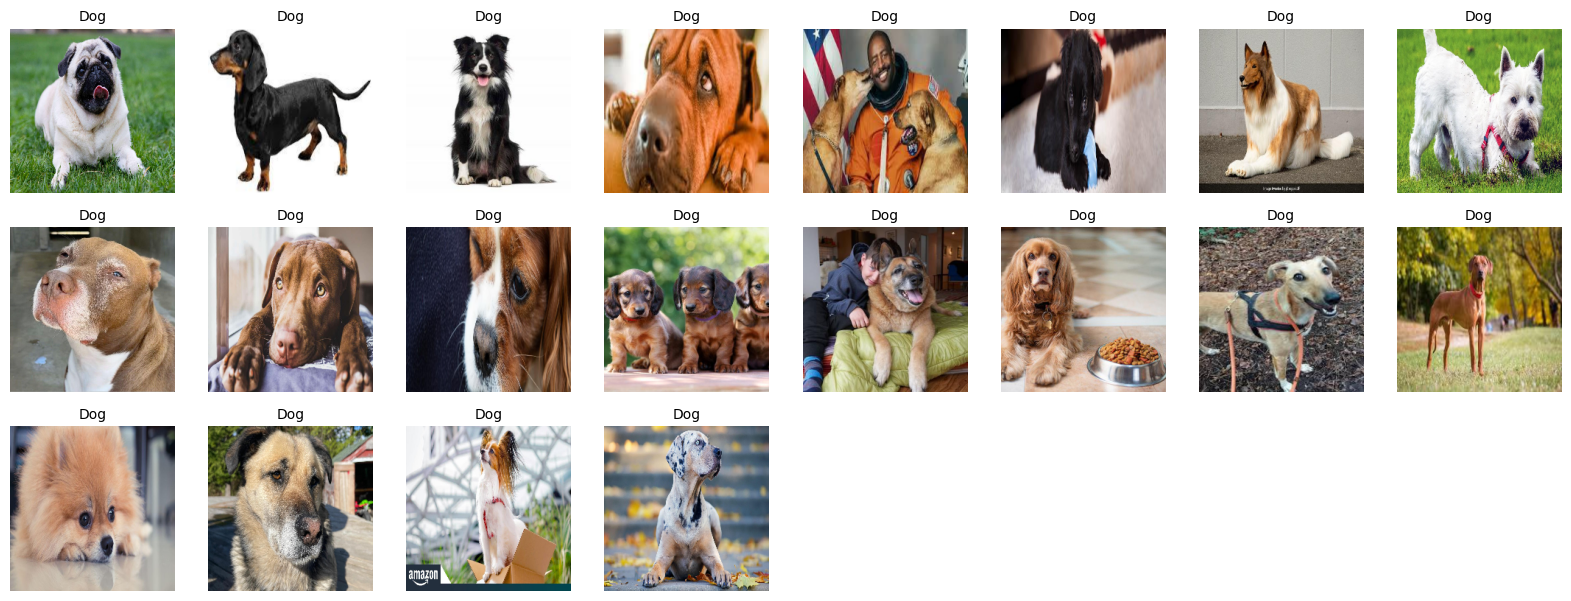

In [33]:
#  Define category names
categories = ["Cat", "Dog"]

# Determine grid size (rows, cols)
num_images = len(train_images)
cols = 8  # Number of columns per row
rows = (num_images // cols) + (num_images % cols > 0)  # Compute required rows

plt.figure(figsize=(cols * 2, rows * 2))  # Adjust figure size

for i in range(20):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_images[i])  # Display image
    plt.axis("off")  # Hide axis
    plt.title(categories[train_labels[i]], fontsize=10)  # Add label title
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()
#unshuffled hence only dogs


## Train after augmenting

In [4]:
train_images = np.load("augmented_train/train_images.npy")
train_labels = np.load("augmented_train/train_labels.npy")  # Assuming this contains labels

train_images.shape, train_labels.shape

((336, 224, 224, 3), (336,))

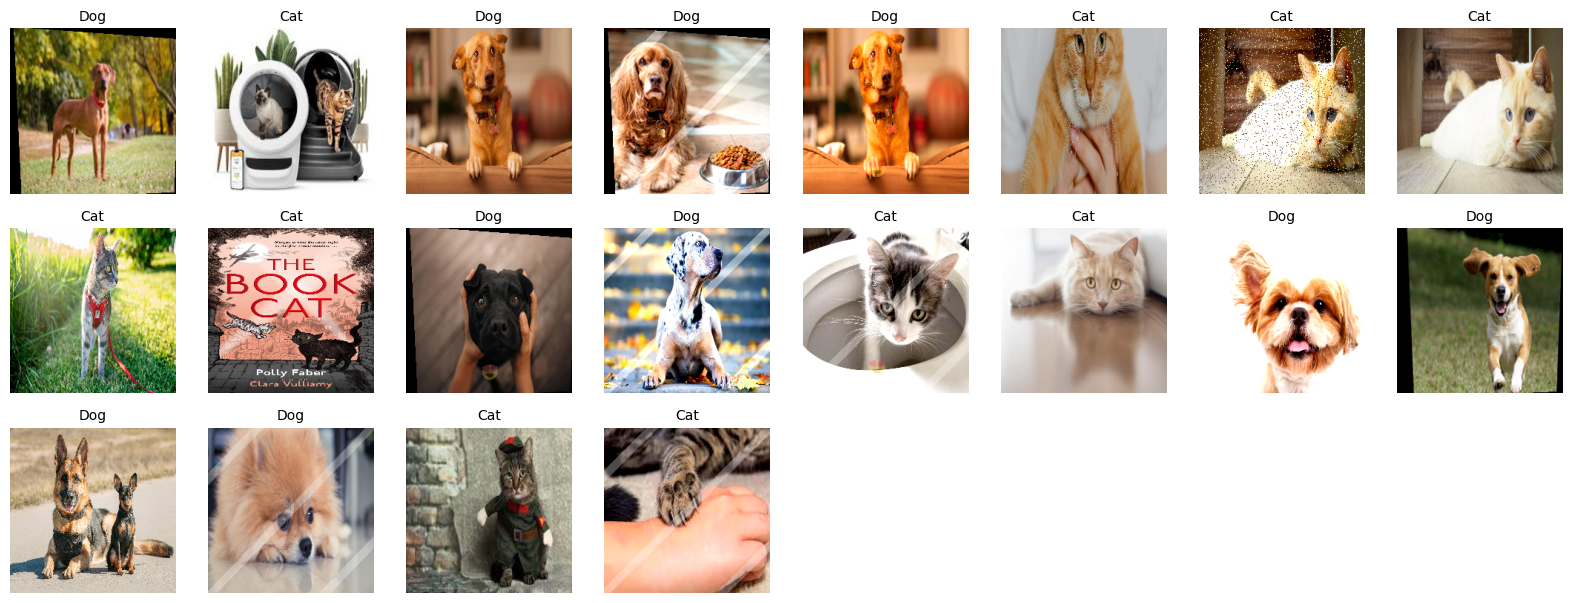

In [5]:
#  Define category names
categories = ["Cat", "Dog"]

# Determine grid size (rows, cols)
num_images = len(train_images)
cols = 8  # Number of columns per row
rows = (num_images // cols) + (num_images % cols > 0)  # Compute required rows

plt.figure(figsize=(cols * 2, rows * 2))  # Adjust figure size

for i in range(20):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_images[i])  # Display image
    plt.axis("off")  # Hide axis
    plt.title(categories[train_labels[i]], fontsize=10)  # Add label title
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Rough work (ignore)

In [5]:
import magic
print(magic.Magic())  # Should not throw an error